### Title: Access to E-book

**Monte Carlo Simulation Scenario:**

Sometimes access to electronic books is limited to a particular number of simultaneous users. That means that if the particular number of people already have this resource open in their browser the next person to try to access this resource will be blocked. When this happens, it is necessary to wait a little while and then return to the resource to see if space has become available.

**Simulation's variables of uncertainty:**
1. Number of users reading a book
2. Duration of reading a book

**Purpose:** Apply Monte Carlo method to simulate:
- **a chance to be blocked** (i.e. a probability not to get access to a book, since a maximum number of simultaneous users per book is exceeded) // (using PERT distribution function)
- **a chance of waiting** (i.e. a probability that it would be necessary to wait for a book) // (using Normal distribution function)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Sim:
    """
    The Sim class consists of the next methods:
        mod_pert_random: PERT distribution function to simulate "number of users reading a book"
        normal_distribution: Normal distribution function to simulate "duration of reading a book"
        pert_plotting: To plot a simulation for "a chance to be blocked"
        norm_plotting: To plot a simulation for "a chance of waiting" 
    """
    
    def mod_pert_random(self, low: int, likely: int, high: int, confidence=4, samples=10000000):
        """Produce random numbers according to the 'Modified PERT'
        distribution.

        :param low: The lowest value expected as possible.
        :param likely: The 'most likely' value, statistically, the mode.
        :param high: The highest value expected as possible.
        :param confidence: This is typically called 'lambda' in literature
                            about the Modified PERT distribution. The value
                            4 here matches the standard PERT curve. Higher
                            values indicate higher confidence in the mode.

        Formulas from "Modified Pert Simulation" by Paulo Buchsbaum.
        """
        # Check minimum & maximum confidence levels to allow:
        confidence = min(8, confidence)
        confidence = max(2, confidence)

        mean = (low + confidence * likely + high) / (confidence + 2)

        a = (mean - low) / (high - low) * (confidence + 2)
        b = ((confidence + 1) * high - low - confidence * likely) / (high - low)

        beta = np.random.beta(a, b, samples)
        beta = beta * (high - low) + low
        return beta

    def normal_distribution(self, mean: float, standard_deviation: float, size=10000000):
        normal = np.random.normal(loc=mean, scale=standard_deviation, size=size)
        return normal

    def pert_plotting(self, pertResults):
        fig = plt.figure()
        plt.hist(pertResults, normed=True, bins = 300)
        fig.suptitle('Monte Carlo Simulation', fontsize=22)
        plt.xlabel('number of users reading a book', fontsize=14)
        plt.ylabel('a chance to be blocked', fontsize=14)
        plt.show()

    def norm_plotting(self, normResults):
        fig = plt.figure()
        plt.hist(normResults, normed=True, bins=300)
        fig.suptitle('Monte Carlo Simulation', fontsize=22)
        plt.xlabel('duration of reading a book', fontsize=14)
        plt.ylabel('a chance of waiting for a book', fontsize=14)
        plt.show()

To simulate a 'number of users reading a book', please enter Low, Likely, and High values. 
The values should be integers greater than 0.
Low: 1
Likely: 4
High: 10
[ 2.42071029  6.09473059  6.84888821 ...,  3.94386407  2.57132188
  3.32948598]


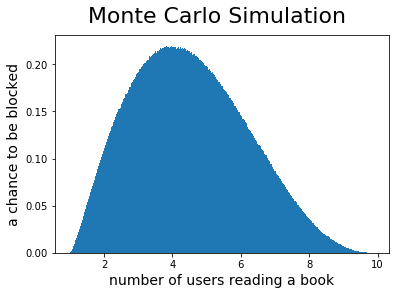

To simulate a 'duration of reading a book', please enter Mean and Standard Deviation values. 
The values should be greater than 0.
Mean: 45
Standard Deviation: 5
[ 53.08000078  49.10293758  47.8674182  ...,  45.53417245  42.11706628
  50.96680258]


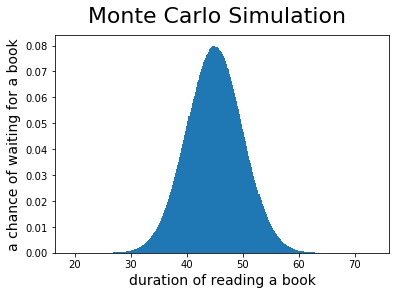

In [3]:
class Program:
    """
    The Program class consists of the next methods:
        checkInputInt: To check that input value is an integer number greater than 0 
        checkInputFloat: To check that input value is any number greater than 0 
        distPERT: To get user inputs to simulate "number of users reading a book"
        distNORM: To get user inputs to simulate "duration of reading a book"
        simPERT: To run simulation to calculate "a chance to be blocked" based on user inputs
        simNORM: To run simulation to calculate "a chance of waiting" based on user inputs  
    """
    
    def __init__(self):
        self.normResults = []
        self.pertResults = []
        self.pert_dist_values = []
        self.norm_dist_values = []

    def checkInputInt(self, input: str) -> bool:
        try:
            if int(input) > 0:
                return True
            else:
                return False
        except:
            return False

    def checkInputFloat(self, input: str) -> bool:
        try:
            if float(input) > 0:
                return True
            else:
                return False
        except:
            return False

    def distPERT(self):
        print("To simulate a 'number of users reading a book', please enter Low, Likely, and High values. \nThe values should be integers greater than 0.")
    
        pert_dist_values = []
        
        low = input("Low: ")
        while not self.checkInputInt(low):
            print("Invalid input. Please enter an integer greater than 0!")
            low = input("Low: ")
        pert_dist_values.append(int(low))


        likely = input("Likely: ")
        while not self.checkInputInt(likely):
            print("Invalid input. Please enter an integer greater than 0!")
            likely = input("Likely: ")
        pert_dist_values.append(int(likely))


        high = input("High: ")
        while not self.checkInputInt(high):
            print("Invalid input. Please enter an integer greater than 0!")
            high = input("High: ")
        pert_dist_values.append(int(high))

        return(pert_dist_values)

    def distNORM(self):
        print("To simulate a 'duration of reading a book', please enter Mean and Standard Deviation values. \nThe values should be greater than 0.")

        norm_dist_values = []
        
        mean = input("Mean: ")
        while not self.checkInputFloat(mean):
            print("Invalid input. Please enter a value greater than 0!")
            mean = input("Mean: ")
        norm_dist_values.append(float(mean))

        standard_deviation = input("Standard Deviation: ")
        while not self.checkInputFloat(standard_deviation):
            print("Invalid input. Please enter a value greater than 0!")
            standard_deviation = input("Standard Deviation: ")
        norm_dist_values.append(float(standard_deviation))

        return(norm_dist_values)

    def simPERT(self):
        simulation1 = Sim()
        pert=self.distPERT()
        sim_var = simulation1.mod_pert_random(pert[0], pert[1], pert[2])
        self.pertResults = sim_var
        print(self.pertResults)
        simulation1.pert_plotting(self.pertResults)

    def simNORM(self):
        simulation2 = Sim()
        norm=self.distNORM()
        sim_var = simulation2.normal_distribution(norm[0], norm[1])
        self.normResults = sim_var
        print(self.normResults)
        simulation2.norm_plotting(self.normResults)

    def executeProgram(self):
        self.simPERT()
        self.simNORM()


if __name__ == "__main__":
    run = Program()
    run.executeProgram()